In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

warnings.filterwarnings("ignore")


In [2]:
data_dir = "/content/Churn_Modelling.csv"
data = pd.read_csv(data_dir)

In [3]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [7]:
numeric_features = [c for c in data.columns if data[c].dtype in ["int64", "float64"]]
print(f"Number of numeric features: {len(numeric_features)}")

Number of numeric features: 9


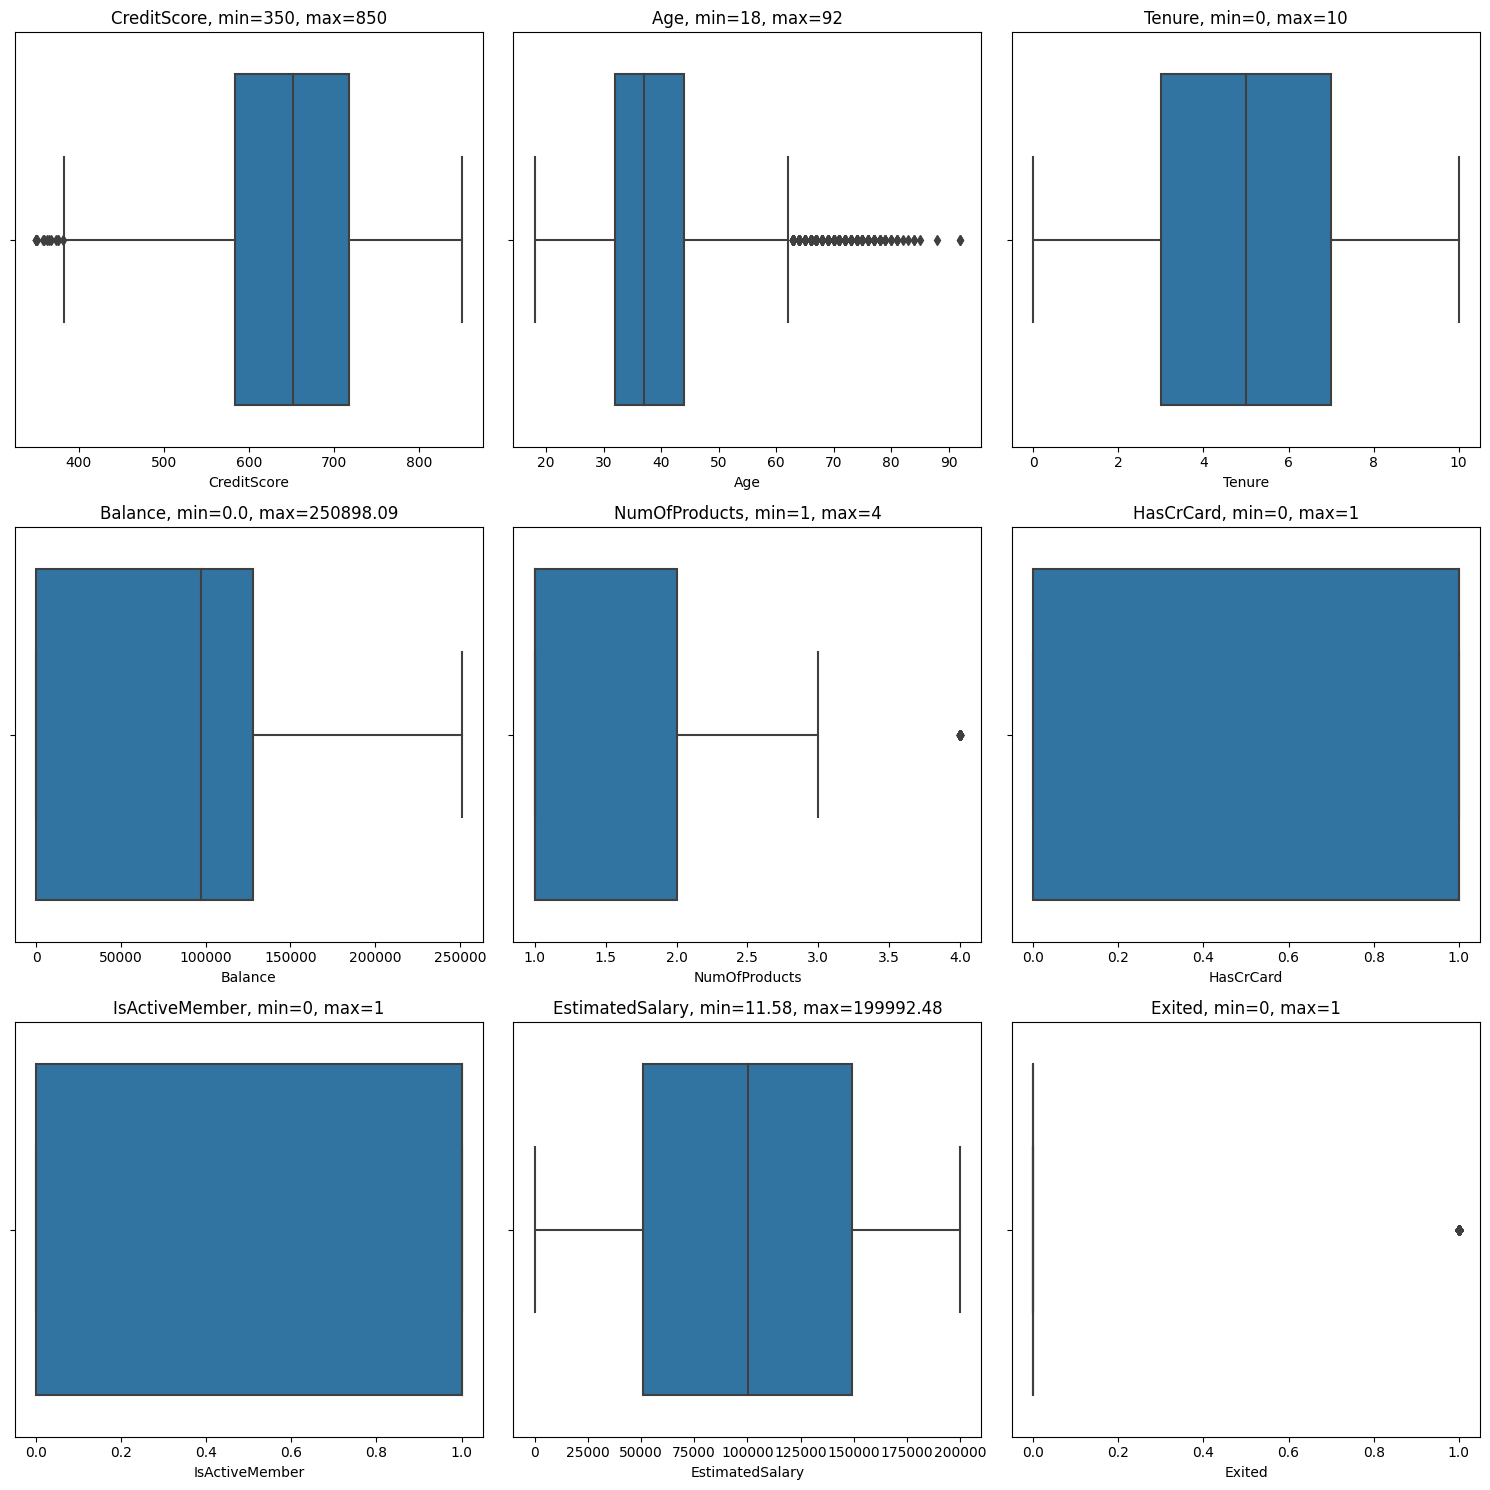

In [8]:
nrows = 3
ncols = 3
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))

for i in range(nrows):
    for j in range(ncols):
        feature = numeric_features[i*ncols+j]
        sns.boxplot(data=data, x=feature, ax=axs[i][j]).set_title(f"{feature}, min={data[feature].min()}, max={data[feature].max()}")

plt.tight_layout()
plt.show()

In [9]:
data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
data["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
data_enc = pd.get_dummies(data)
data_enc.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2                  0                0              1            0  
3                  0                0              1            0  
4                  0                1              1            0

In [12]:
data_enc = data_enc.drop(columns=["Geography_France", "Gender_Female"])
data_enc.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

In [13]:
data_enc["Geography_Germany"] = data_enc["Geography_Germany"].astype(np.int64)
data_enc["Geography_Spain"] = data_enc["Geography_Spain"].astype(np.int64)
data_enc["Gender_Male"] = data_enc["Gender_Male"].astype(np.int64)

data_enc.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

In [14]:
data = data_enc.copy()

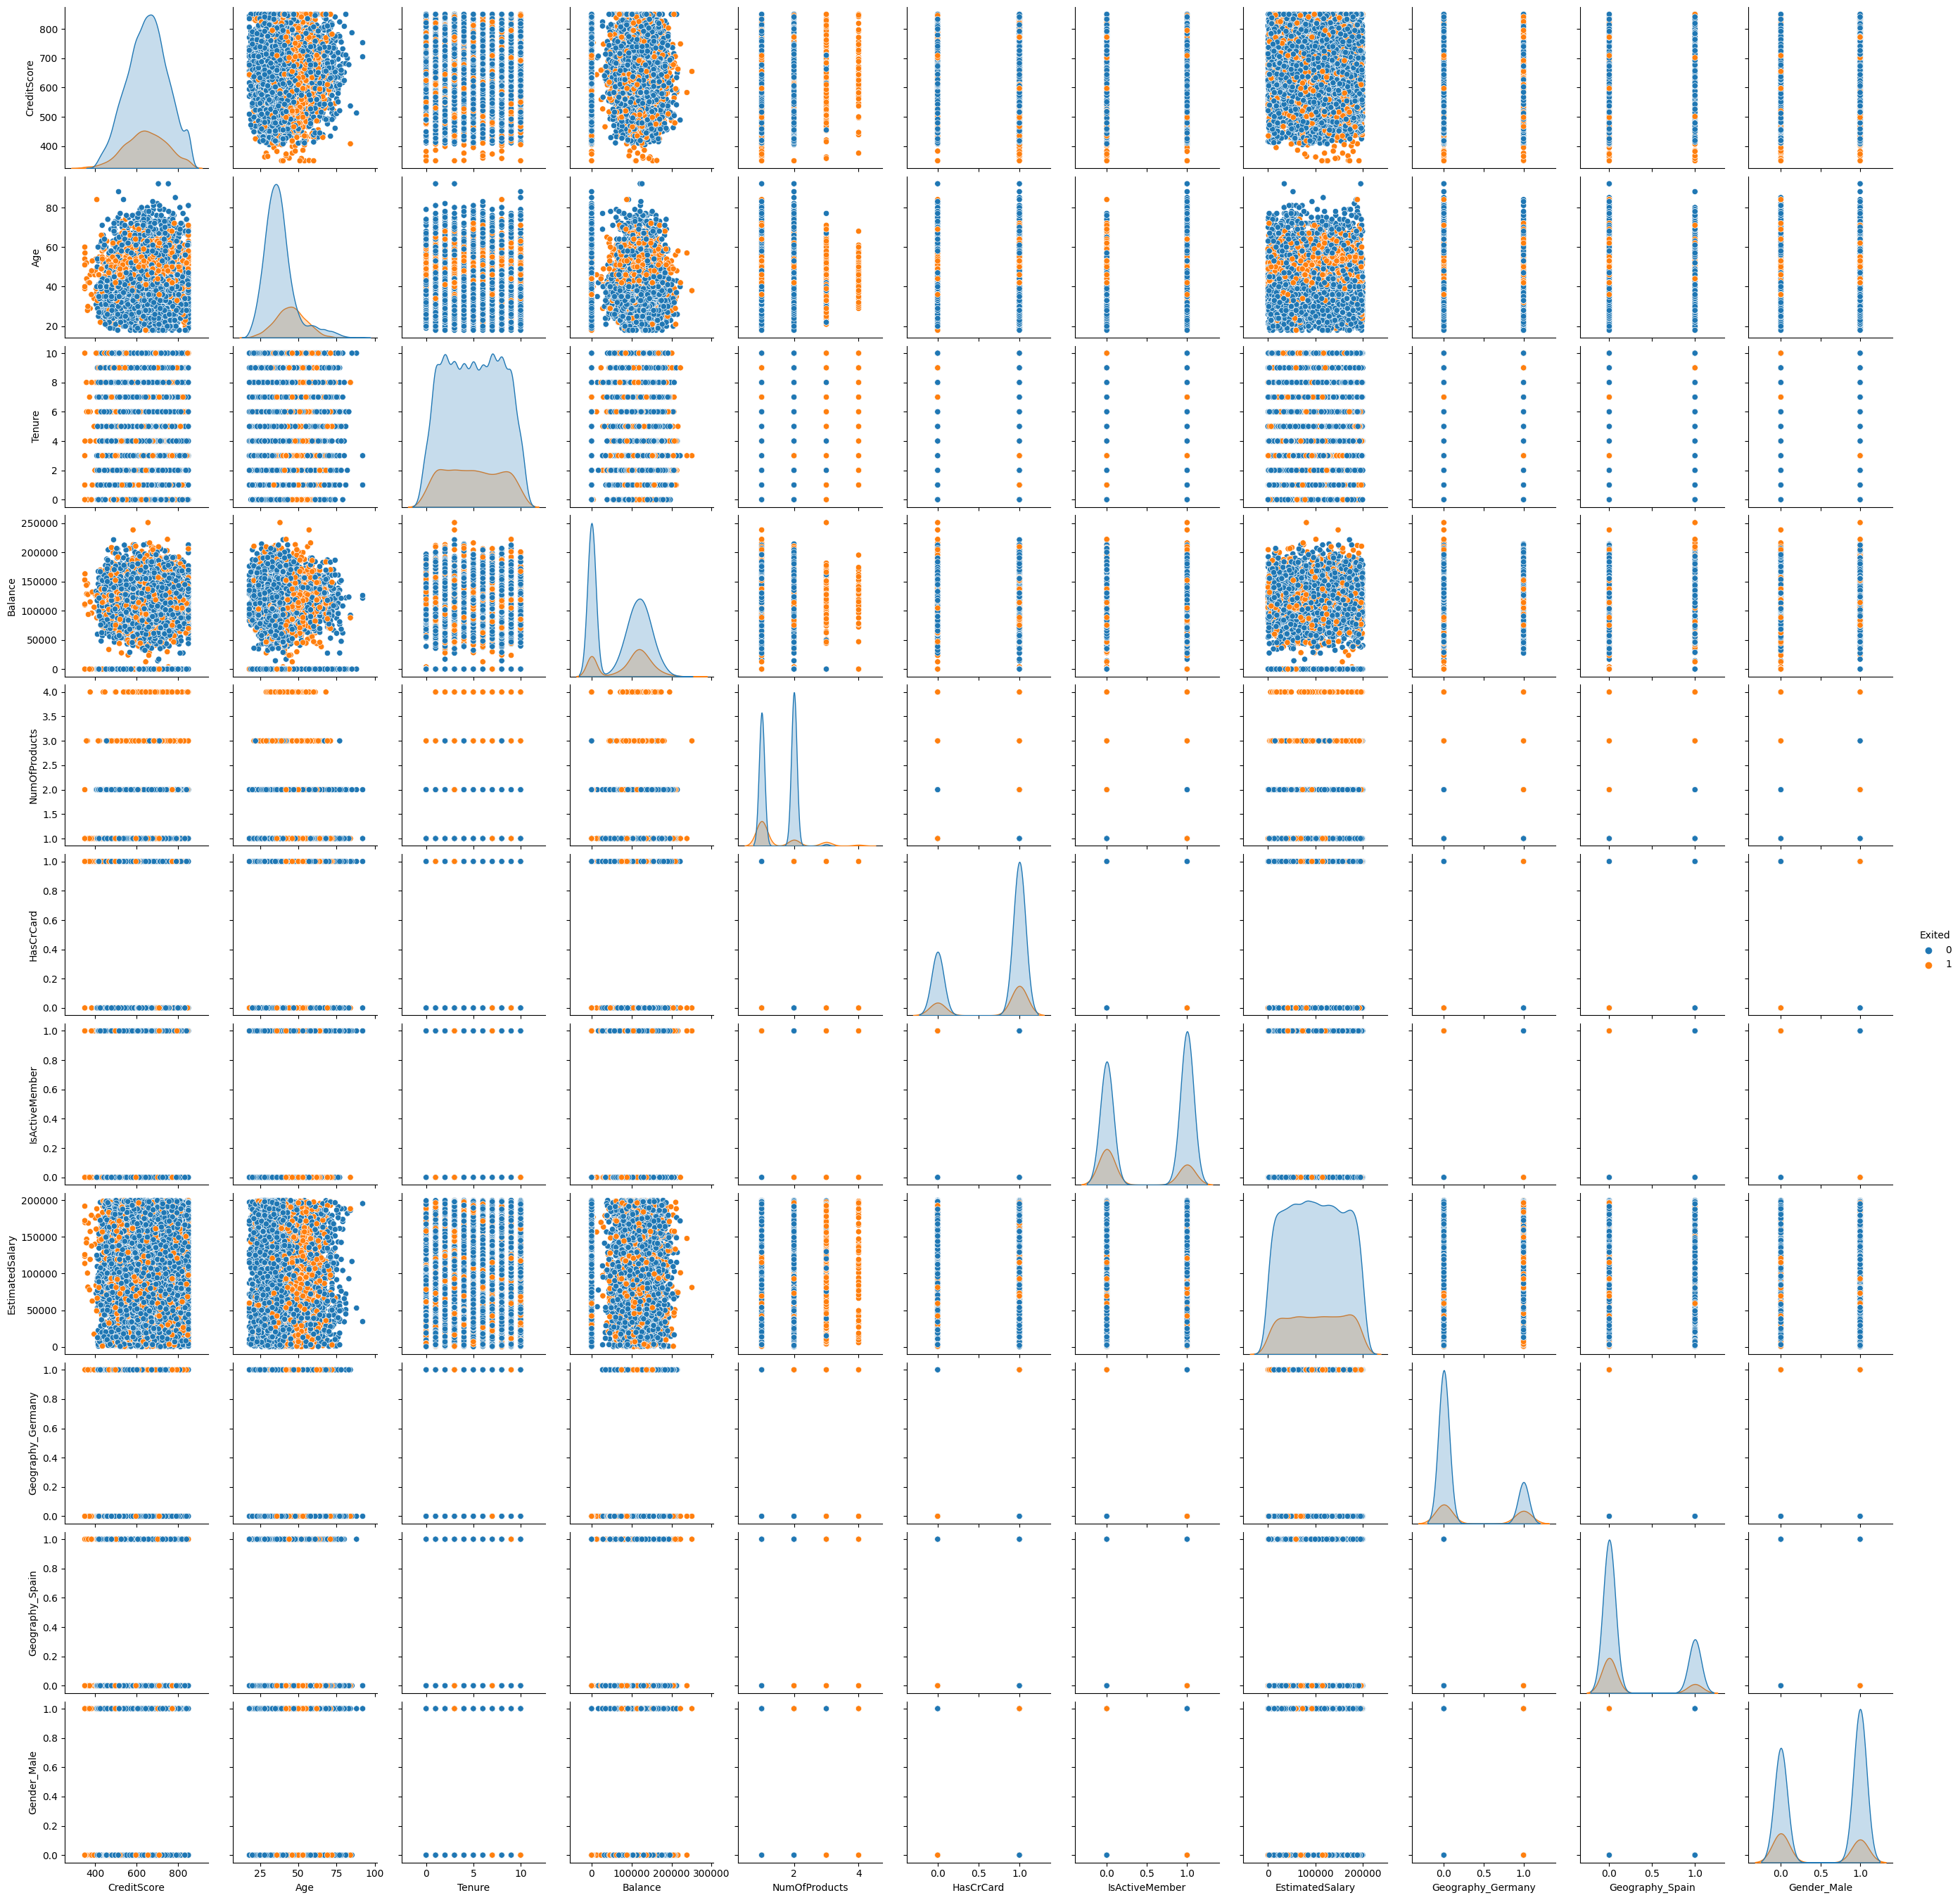

In [15]:
sns.pairplot(data, hue="Exited")
plt.show()

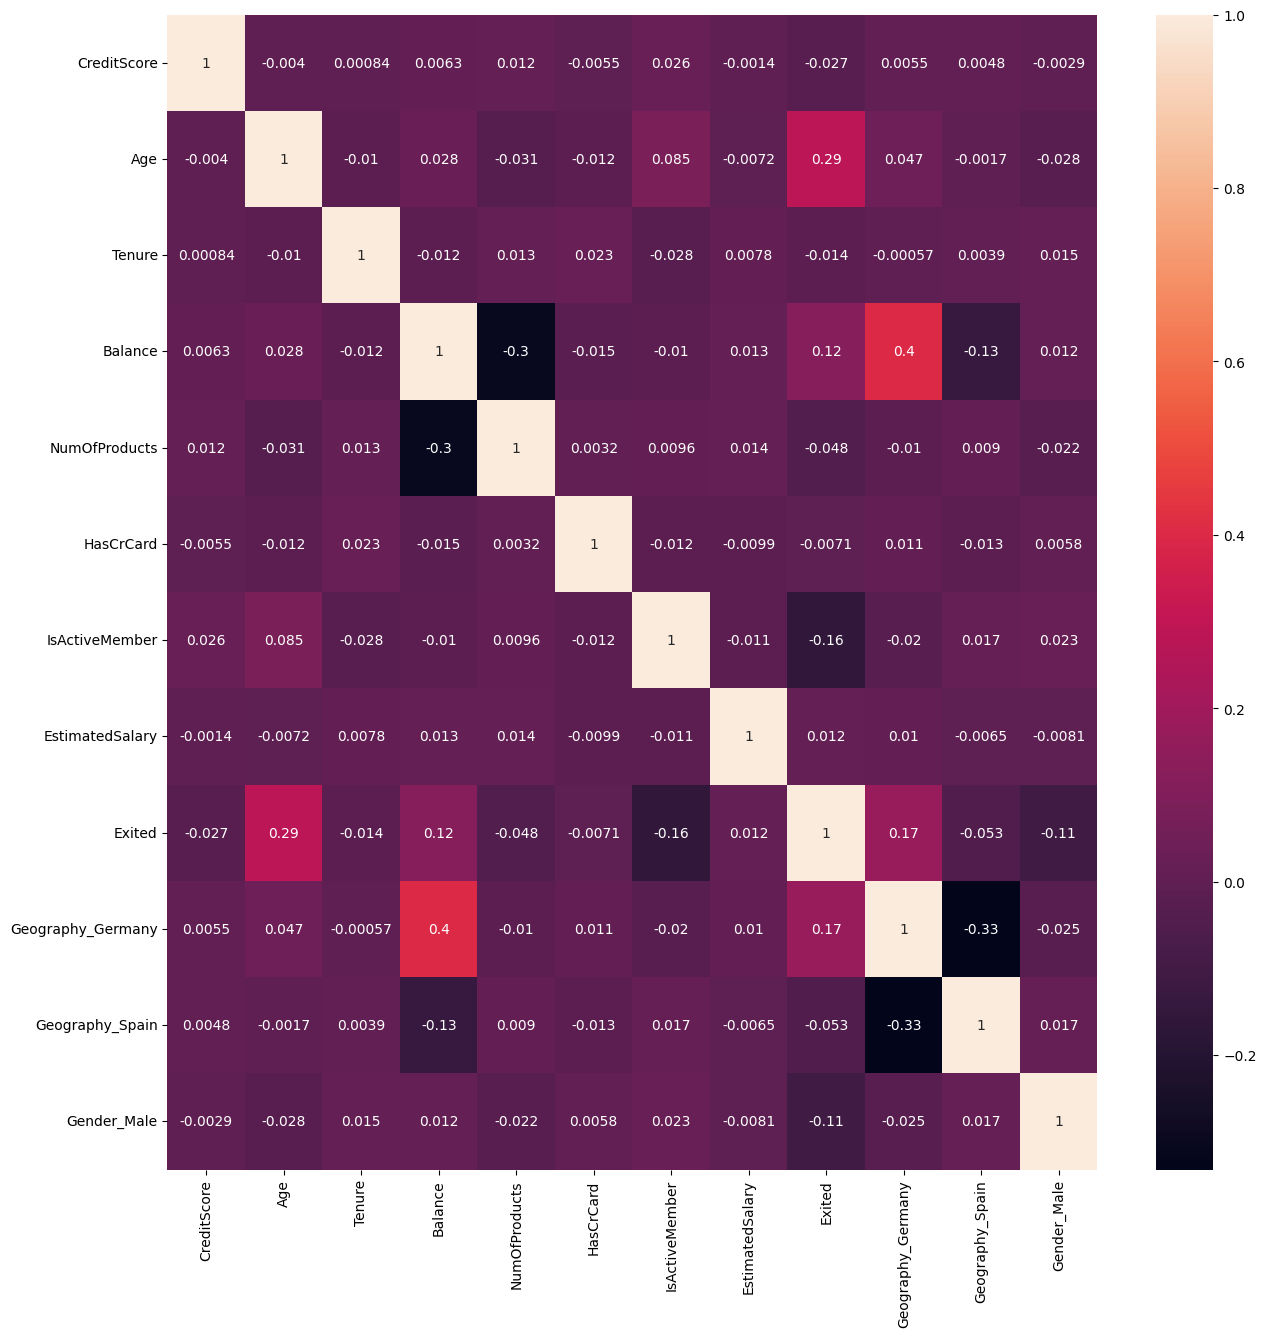

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [17]:
X = data[[c for c in data.columns if c != "Exited"]]
y = data["Exited"]

In [18]:
pf = PolynomialFeatures(degree=2)
pf_data = pf.fit_transform(X)
pf_data = pd.DataFrame(pf_data, columns=pf.get_feature_names_out())
pf_data.head()

1  CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0  1.0        619.0  42.0     2.0       0.00            1.0        1.0   
1  1.0        608.0  41.0     1.0   83807.86            1.0        0.0   
2  1.0        502.0  42.0     8.0  159660.80            3.0        1.0   
3  1.0        699.0  39.0     1.0       0.00            2.0        0.0   
4  1.0        850.0  43.0     2.0  125510.82            1.0        1.0   

   IsActiveMember  EstimatedSalary  Geography_Germany  ...  EstimatedSalary^2  \
0             1.0        101348.88                0.0  ...       1.027160e+10   
1             1.0        112542.58                0.0  ...       1.266583e+10   
2             0.0        113931.57                0.0  ...       1.298040e+10   
3             0.0         93826.63                0.0  ...       8.803436e+09   
4             1.0         79084.10                0.0  ...       6.254295e+09   

   EstimatedSalary Geography_Germany  EstimatedSalary Geography_Spain  \
0                                0.0                             0.00   
1                                0.0                        112542.58   
2                                0.0                             0.00   
3                                0.0                             0.00   
4                                0.0                         79084.10   

   EstimatedSalary Gender_Male  Geography_Germany^2  \
0                          0.0                  0.0   
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   

   Geography_Germany Geography_Spain  Geography_Germany Gender_Male  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   

   Geography_Spain^2  Geography_Spain Gender_Male  Gender_Male^2  
0                0.0                          0.0            0.0  
1                1.0                          0.0            0.0  
2                0.0                          0.0            0.0  
3                0.0                          0.0            0.0  
4                1.0                          0.0            0.0  

[5 rows x 78 columns]

In [19]:
pf_data = pf_data.iloc[:, 1:]

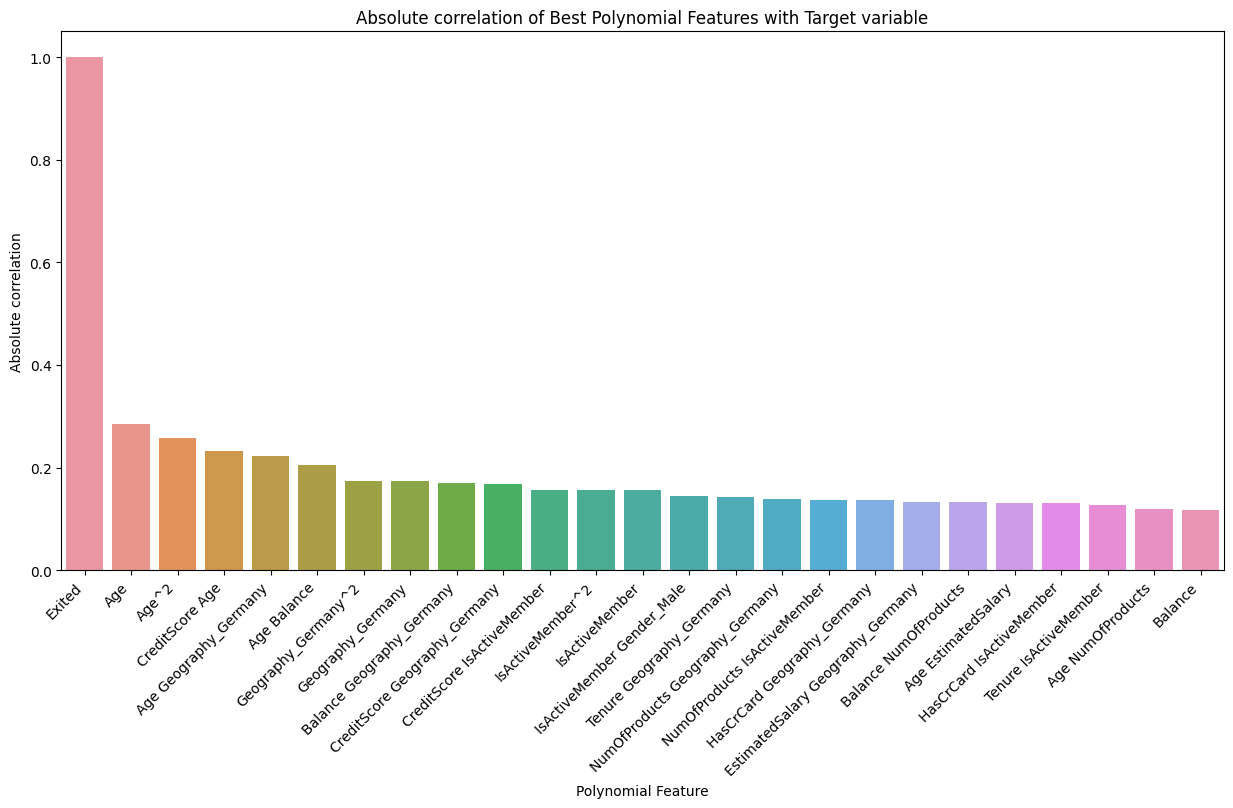

In [20]:
pf_data["Exited"] = y
pf_data_corr = pf_data.corr()["Exited"]
pf_data_corr = pf_data_corr.abs()
pf_data_corr = pf_data_corr.sort_values(ascending=False)
pf_data_corr_best = pf_data_corr[:25]

plt.figure(figsize=(15, 7))
chart = sns.barplot(x=pf_data_corr_best.index, y=pf_data_corr_best.values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title("Absolute correlation of Best Polynomial Features with Target variable")
chart.set_ylabel("Absolute correlation")
chart.set_xlabel("Polynomial Feature")
plt.show()

In [21]:
X.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0               1        101348.88                  0                0   
1               1        112542.58                  0                1   
2               0        113931.57                  0                0   
3               0         93826.63                  0                0   
4               1         79084.10                  0                1   

   Gender_Male  
0            0  
1            0  
2            0  
3            0  
4            0

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

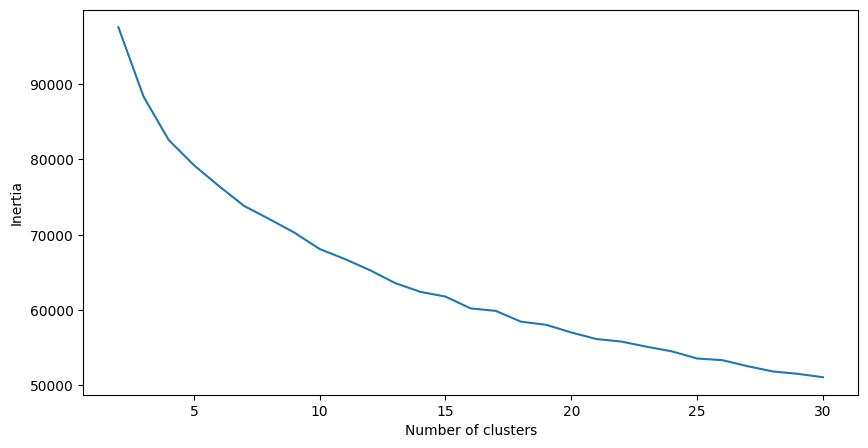

In [23]:
n_clusters = range(2, 31)
inertias = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
chart = sns.lineplot(x=n_clusters, y=inertias)
chart.set_xlabel("Number of clusters")
chart.set_ylabel("Inertia")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(X_scaled)

KMeans(n_clusters=9)

In [26]:
pca_2 = PCA(2)
pca_2.fit(X_scaled)
pca_2X = pca_2.transform(X_scaled)
pca_2X = pd.DataFrame(pca_2X, columns=["comp1", "comp2"])
pca_2X["cluster"] = kmeans.predict(X_scaled)
pca_2X["Exited"] = y

fig = px.scatter(pca_2X, x="comp1", y="comp2", color="cluster", symbol="Exited")
fig.update_layout(
    coloraxis_colorbar=dict(yanchor="top", y=1, x=-0.2, ticks="outside")
)
fig.show()

In [27]:
pca_3 = PCA(3)
pca_3.fit(X_scaled)
pca_3X = pca_3.transform(X_scaled)
pca_3X = pd.DataFrame(pca_3X, columns=["comp1", "comp2", "comp3"])
pca_3X["cluster"] = kmeans.predict(X_scaled)
pca_3X["Exited"] = y
fig = px.scatter_3d(pca_3X, x="comp1", y="comp2", z="comp3", color="cluster", symbol="Exited")
fig.update_layout(
    coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside")
)
fig.show()

In [28]:
cluster_target = pd.DataFrame({"cluster": pca_3X.cluster, "Exited": y})
cluster_target["cluster"] = cluster_target["cluster"].map(lambda x: f"cluster{x}")
cluster_target = pd.get_dummies(cluster_target)
cluster_target = cluster_target.astype(np.int64)
cluster_target.head()

Exited  cluster_cluster0  cluster_cluster1  cluster_cluster2  \
0       1                 0                 0                 0   
1       0                 0                 0                 0   
2       1                 0                 0                 0   
3       0                 0                 1                 0   
4       0                 0                 0                 0   

   cluster_cluster3  cluster_cluster4  cluster_cluster5  cluster_cluster6  \
0                 0                 1                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   cluster_cluster7  cluster_cluster8  
0                 0                 0  
1                 1                 0  
2                 0                 1  
3                 0                 0  
4                 1                 0

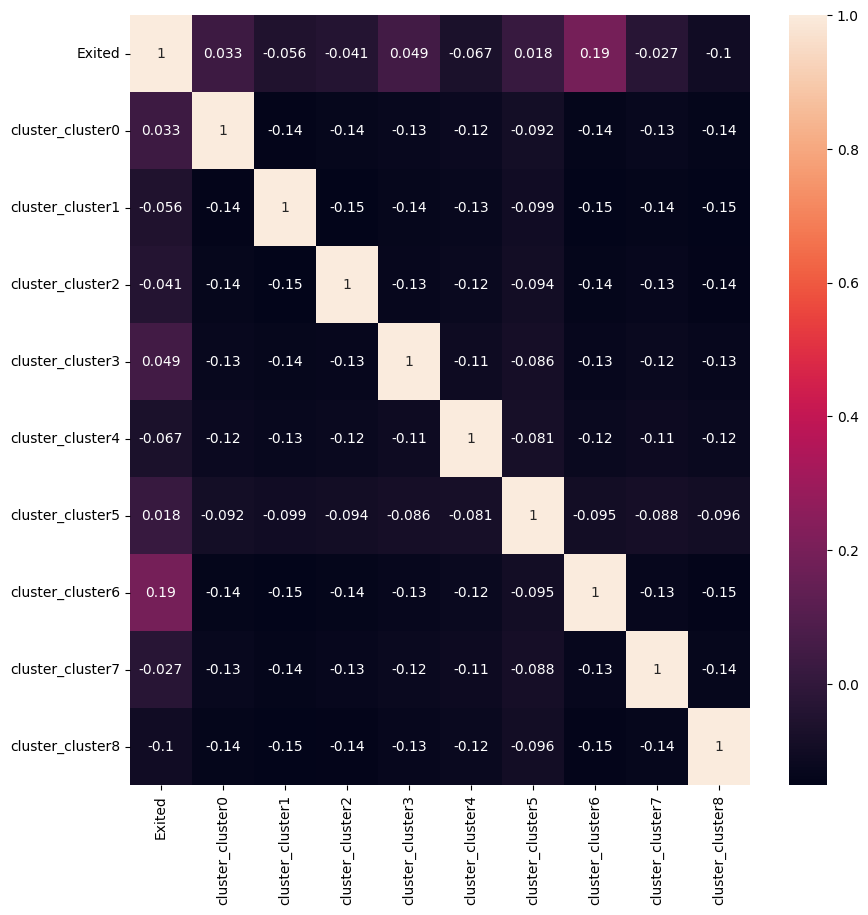

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(cluster_target.corr(), annot=True)
plt.show()